<a href="https://colab.research.google.com/github/MrBigBrane/Machine-Learning/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [336]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

## Preprocessing

In [338]:
X_train_data = train_data.drop("Transported", axis=1)
y_train_data = train_data["Transported"]

X_train_data.drop("Name", axis=1, inplace=True)

X_test_data = test_data.drop("Name", axis=1)
X_test_copy = X_test_data.copy()

# Checking how much of data is null (train)
for col in X_train_data.columns:
    if (X_train_data[col].isnull().sum()/X_train_data.shape[0])*100>50:
        print(col, (X_train_data[col].isnull().sum()/X_train_data.shape[0])*100)
    else:
        print(col, (X_train_data[col].isnull().sum()/X_train_data.shape[0])*100)

PassengerId 0.0
HomePlanet 2.312205222592891
CryoSleep 2.4962613597147127
Cabin 2.289198205452663
Destination 2.093638559760727
Age 2.0591280340503855
VIP 2.3352122397331185
RoomService 2.082135051190613
FoodCourt 2.105142068330841
ShoppingMall 2.392729782583688
Spa 2.105142068330841
VRDeck 2.1626596111814105


In [339]:
# Checking how much of data is null (test)
for col in X_test_data.columns:
    if (X_train_data[col].isnull().sum()/X_train_data.shape[0])*100>50:
        print(col, (X_test_data[col].isnull().sum()/X_test_data.shape[0])*100)
    else:
        print(col, (X_test_data[col].isnull().sum()/X_test_data.shape[0])*100)

PassengerId 0.0
HomePlanet 2.034136076689268
CryoSleep 2.1744213233574934
Cabin 2.338087444470423
Destination 2.1510404489127897
Age 2.127659574468085
VIP 2.1744213233574934
RoomService 1.917231704465747
FoodCourt 2.4783726911386488
ShoppingMall 2.2913256955810146
Spa 2.3614683189151275
VRDeck 1.8704699555763384


In [340]:
# Get column names that have object/string data
string_cols = X_test_data.select_dtypes(include=['object']).columns

# Get column names that have numerical data
num_cols = X_test_data.select_dtypes(include=['int64', 'float64']).columns

# Filling n/a values in columns with numerical data with median of each column
X_train_data[num_cols] = X_train_data[num_cols].fillna(X_train_data[num_cols].median())
X_test_data[num_cols] = X_test_data[num_cols].fillna(X_train_data[num_cols].median())

# Filling n/a values in columns with letter/string data with the most common value of each column
X_train_data[string_cols] = X_train_data[string_cols].fillna(X_train_data[string_cols].mode().iloc[0])
X_test_data[string_cols] = X_test_data[string_cols].fillna(X_train_data[string_cols].mode().iloc[0])

# Get columns that are boolean
bool_cols = X_test_data.select_dtypes(include=['bool']).columns

print(bool_cols)

# Convert boolean columns to integers
X_train_data[bool_cols] = X_train_data[bool_cols].astype(int)
X_test_data[bool_cols] = X_test_data[bool_cols].astype(int)

Index(['CryoSleep', 'VIP'], dtype='object')


<ipython-input-340-32e75aa0b5fa>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_data[string_cols] = X_train_data[string_cols].fillna(X_train_data[string_cols].mode().iloc[0])
<ipython-input-340-32e75aa0b5fa>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_data[string_cols] = X_test_data[string_cols].fillna(X_train_data[string_cols].mode().iloc[0])


In [341]:
# Split id into the two groups
X_train_data["PassengerGroup"] = X_train_data['PassengerId'].str[:4].astype(int)
X_train_data["PassengerNumber"] = X_train_data['PassengerId'].str[5:].astype(int)
X_train_data.drop("PassengerId", axis=1, inplace=True)

X_test_data["PassengerGroup"] = X_test_data['PassengerId'].str[:4].astype(int)
X_test_data["PassengerNumber"] = X_test_data['PassengerId'].str[5:].astype(int)
X_test_data.drop("PassengerId", axis=1, inplace=True)

# Split cabin into two groups
X_train_data["CabinDeck"] = X_train_data['Cabin'].str[0]
X_train_data["CabinSide"] = X_train_data['Cabin'].str[-1]
X_train_data.drop("Cabin", axis=1, inplace=True)

X_test_data["CabinDeck"] = X_test_data['Cabin'].str[0]
X_test_data["CabinSide"] = X_test_data['Cabin'].str[-1]
X_test_data.drop("Cabin", axis=1, inplace=True)

# Update string cols to the non-boolean columns
string_cols = X_train_data.select_dtypes(include=['object']).columns

## One Hot Encoding

In [342]:
# One hot encode only the string value columns
X_train_encoded = pd.get_dummies(X_train_data, columns=string_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_data, columns=string_cols, drop_first=True)

non_binary_columns_test = [
    col for col in X_test_encoded.columns if X_train_encoded[col].nunique() != 2
]
binary_columns_test = [
    col for col in X_test_encoded.columns if X_train_encoded[col].nunique() == 2
]

# Cast boolean ohe to int
X_train_encoded[binary_columns_test] = X_train_encoded[binary_columns_test].astype(int)
X_test_encoded[binary_columns_test] = X_test_encoded[binary_columns_test].astype(int)

In [343]:
# PSA: Removing outliers did improve the model

# from scipy.stats import zscore

# z_scores = np.abs(zscore(X_train_encoded[num_cols]))

# # Define threshold for Z-score
# threshold = 3

# test = X_train_encoded[num_cols]

# # Remove rows where any feature has a Z-score > threshold
# X_train_encoded[num_cols] = test[(z_scores < threshold).all(axis=1)]

# X_train_encoded.dropna(inplace=True)
# y_train_data = y_train_data.loc[X_train_encoded.index]

<ipython-input-354-132381189a31>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


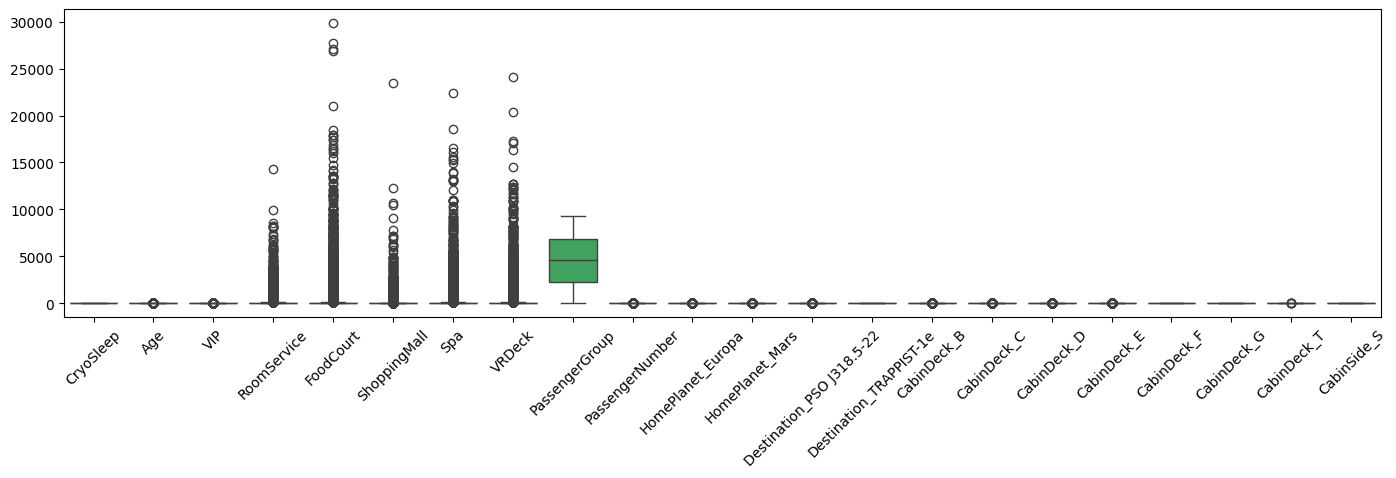

In [354]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=X_train_encoded)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

## Data Scaling/Splitting

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y_train_data, test_size=0.2, random_state=42)


# Scale non-binary data columns with min max scaler (worked best)
scaler = MinMaxScaler()
X_train[non_binary_columns_test] = scaler.fit_transform(X_train[non_binary_columns_test])

X_test[non_binary_columns_test] = scaler.transform(X_test[non_binary_columns_test])

X_test_encoded[non_binary_columns_test] = scaler.transform(X_test_encoded[non_binary_columns_test])

## LinearSVC

In [309]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# LinearSVC model
model = LinearSVC(max_iter=10000)

# Grid of parameters
param_grid = {
    'C': [10, 100, 150, 250, 500],
    'loss': ['squared_hinge'],
    'penalty': ['l2'],
    'dual': [False]  # dual=False is required for l1 penalty
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'}
Best Cross-Validation Score: 0.7790224803459851


In [310]:
best_params = grid_search.best_params_

final_model = LinearSVC(
    C=best_params['C'],
    loss=best_params['loss'],
    penalty=best_params['penalty'],
    dual=best_params['dual']
)

# Train the model
final_model.fit(X_train, y_train)

LinearSVC(C=10, dual=False)

In [311]:
from sklearn.metrics import accuracy_score

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7877833753148614


## XGBoost

In [93]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 73.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [317]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.3]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:57:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [318]:
best_params = grid_search.best_params_
best_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:58:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7991183879093199


## LightGBM

In [55]:
pip install lightgbm

In [319]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.1, 0.01, 0.005],
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10],
    'feature_fraction': [0.8, 0.9, 1.0],
    'verbose': [-1]
}

# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier(random_state=42)

# Set up GridSearchCV
# grid_search = RandomizedSearchCV(
#     estimator=lgb_clf,
#     param_distributions=param_grid,
#     n_iter=50,  # Number of parameter settings sampled
#     cv=3,  # 5-fold cross-validation
#     scoring='accuracy',  # Optimize for accuracy
# )
grid_search = GridSearchCV(
    estimator=lgb_clf,
    param_grid=param_grid,
    cv=3,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 15, 'verbose': -1}
Best CV Score: 0.7927253615598394


In [320]:
best_params = grid_search.best_params_
best_xgb = lgb.LGBMClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8117128463476071


## KNN

In [321]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Minkowski metric with p=1 is Manhattan distance, p=2 is Euclidean.
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    verbose=1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Score: 0.7695709312931628


In [322]:
best_params = grid_search.best_params_
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8117128463476071


## Voting Classifier

In [325]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lightgbm', lightgbm),
        ('xgboost', xgboost),
        ('linearsvc', linearsvc),
        ('knn', knn)
    ],
    voting='hard')

# Train the model
voting_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = voting_clf.predict(X_test)
print("Voting Model Accuracy:", accuracy_score(y_test, y_pred))

Voting Model Accuracy: 0.8060453400503779


## Model Stack

In [352]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define model parameters

xgb_params = {'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
lgbm_params = {'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 15, 'verbose': -1}
knn_params = {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
linearsvc_params = {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

# Define base models
lightgbm = lgb.LGBMClassifier(**lgbm_params, random_state=42)
xgboost = XGBClassifier(**xgb_params, eval_metric='logloss', random_state=42)
knn = KNeighborsClassifier(**knn_params)
linearsvc = LinearSVC(C=10, dual=False, loss='squared_hinge', penalty='l2', random_state=42)

# Define meta-learner (e.g., Logistic Regression)
meta_learner = LogisticRegression()

# Create stacking model
stacking_clf = StackingClassifier(
    estimators=[
        ('lightgbm', lightgbm),
        ('xgboost', xgboost),
        ('linearsvc', linearsvc),
        ('knn', knn),
    ],
    final_estimator=meta_learner,
    cv=5  # Cross-validation for blending
)

# Fit stacking model
stacking_clf.fit(X_train, y_train)

# Evaluate
y_pred = stacking_clf.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred))

Stacking Model Accuracy: 0.8016101207590569


In [314]:
submission_pred = stacking_clf.predict(X_test_encoded)

print(submission_pred.astype(bool))

[ True False  True ...  True  True  True]


In [315]:
ans=pd.DataFrame({'PassengerId':X_test_copy['PassengerId'],'Transported':submission_pred})
ans.to_csv('submission.csv',index=False)

In [316]:
ans

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
